<a href="https://colab.research.google.com/github/tawkirahmed/travis-log-mining/blob/develop/tawkir_week_4_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir("/content/drive/My Drive/Data Mining Lab Project")
dataset_path = '/content/drive/My Drive/Data Mining Lab Project/travistorrent_8_2_2017.csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
import sys
sys.path.insert(1, '/content/drive/My Drive/DataAnalytics')
import data_helper
import matplotlib.dates as mdates

# pd.describe_option('display')
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 50)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'left')

In [0]:
# style
plt.style.use('fivethirtyeight')
import matplotlib.font_manager
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [4]:
dataset = pd.read_csv(dataset_path, sep=',')
dataset.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,6,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3702595, 62)

# Focused Anomaly Analysis

We are going to analyze 'tr_log_num_tests_ok', 'tr_log_num_tests_failed' 'tr_log_num_tests_run', 'tr_log_num_tests_skipped'

In [0]:
target_cols = ['tr_log_num_tests_ok', 'tr_log_num_tests_failed', 'tr_log_num_tests_run', 'tr_log_num_tests_skipped']
key_cols = ['gh_project_name']

In [0]:
# Let's see some stat
target_col = target_cols[0]
def gen_stat(data):
    result = data.describe(percentiles = [0.1, 0.2, 0.5, 0.75, 0.90, 0.95, 0.98, 0.99]).T.reset_index().rename(columns={"index": "feature_name"})
    # result.insert(0, 'gh_project_name', data['gh_project_name'].values[0])
    return result

stat = dataset[[target_col] + key_cols].groupby('gh_project_name').apply(gen_stat).reset_index().sort_values(['max'], ascending = False)

<Figure size 576x396 with 0 Axes>

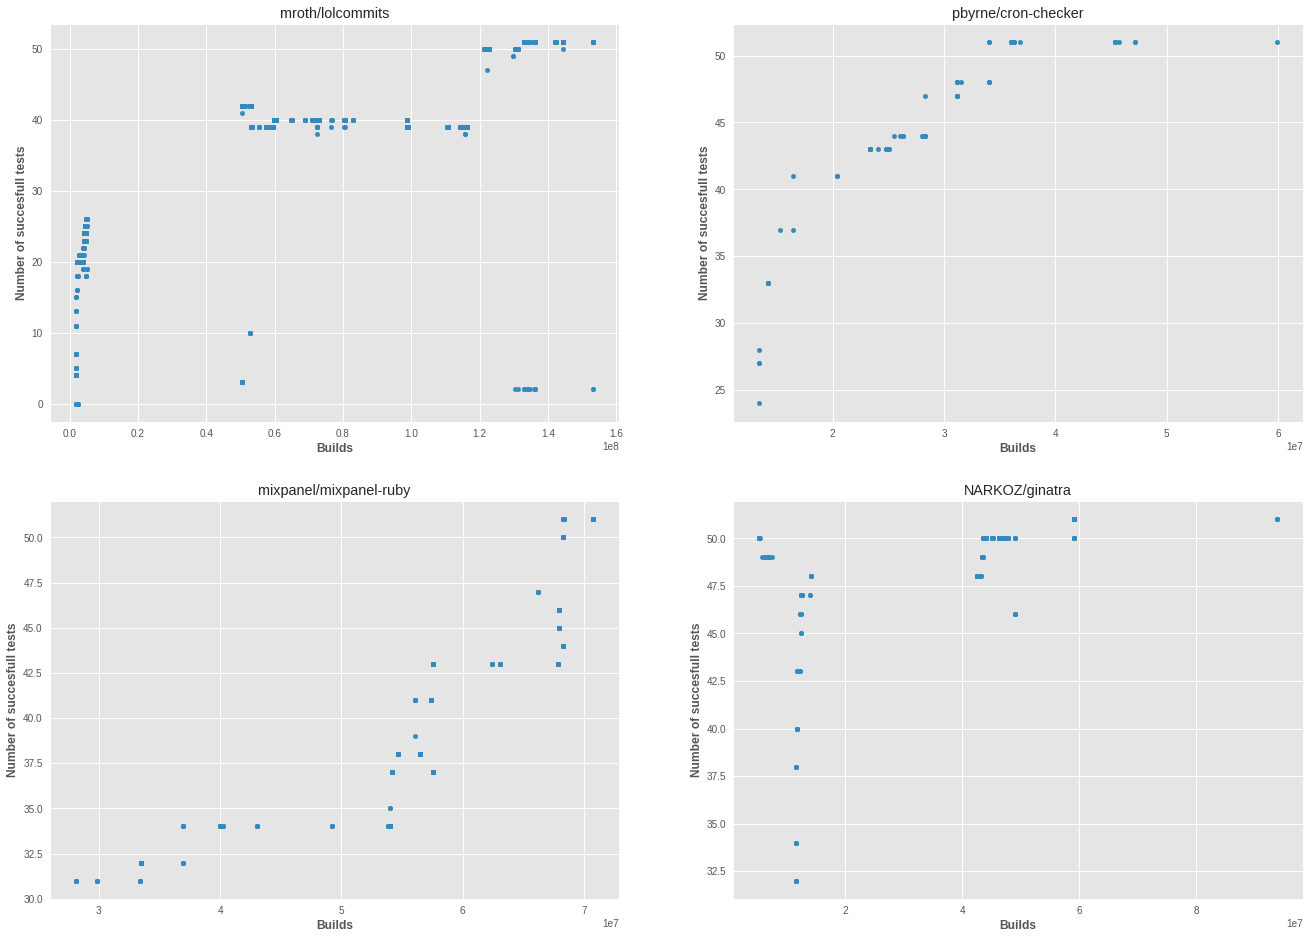

In [99]:
col_name = 'Number of succesfull tests'
plt.tight_layout()
plt.style.use('ggplot')
selected_total = 4 #len(stat)
tem = stat [ stat['max'] > 50 ].sort_values(['max'], ascending = True)
projects = tem['gh_project_name'].head(selected_total).values
per_row = 2
fig, axs = plt.subplots(selected_total // per_row,per_row)
# fig.subplots_adjust(hspace=.5)
for project, ax in zip(projects, axs.flat):
    selected_data = (
        dataset[ dataset['gh_project_name'] == project][['tr_build_id', 'tr_log_num_tests_ok']]
    ).dropna().sort_values(['tr_build_id'], ascending = True)
    ax.title.set_text(project)
    # ax.yaxis.set_label(col_name)
    plot_kind = 'scatter' # 'density' # 'scatter'
    selected_data.plot(kind = plot_kind, x = 'tr_build_id', y = 'tr_log_num_tests_ok', ax = ax, figsize = (20, 15))
    # ax.legend().get_texts()[0].set_text(col_name)
    ax.set(xlabel="Builds", ylabel=col_name)